Загрузка данных. Приводим столбец с датой, в формат datetime.

In [25]:
import pandas as pd
import plotly 
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
import numpy as np
import matplotlib 
df = pd.read_csv('co2-ppm-daily.csv')
df['date'] = pd.to_datetime(df['date'])
print(df)

            date   value
0     1958-03-30  316.16
1     1958-03-31  316.40
2     1958-04-02  317.67
3     1958-04-03  317.76
4     1958-04-04  317.09
...          ...     ...
18759 2017-12-27  406.88
18760 2017-12-28  408.26
18761 2017-12-29  407.53
18762 2017-12-30  407.30
18763 2017-12-31  407.01

[18764 rows x 2 columns]


Визуализируем данные.

In [26]:
# df.resample('1H', on='date')
px.scatter(x=df['date'], y=df['value']).show()

Строим прогноз возможных выбросов СО2 в атмосферу на ближайшие 2 года.

In [27]:
from prophet import Prophet
df.rename(columns = {'date':'ds', 'value':'y'}, inplace = True)
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'trend']].tail()
print(forecast)

14:01:15 - cmdstanpy - INFO - Chain [1] start processing
14:01:19 - cmdstanpy - INFO - Chain [1] done processing


              ds       trend  yhat_lower  yhat_upper  trend_lower   
0     1958-03-30  314.860405  316.058285  317.672401   314.860405  \
1     1958-03-31  314.862829  316.048780  317.669124   314.862829   
2     1958-04-02  314.867675  316.168444  317.829253   314.867675   
3     1958-04-03  314.870099  316.236420  317.897892   314.870099   
4     1958-04-04  314.872522  316.198253  317.956054   314.872522   
...          ...         ...         ...         ...          ...   
19124 2018-12-27  409.017632  407.697050  409.474032   408.843521   
19125 2018-12-28  409.023747  407.751762  409.534679   408.848101   
19126 2018-12-29  409.029861  407.765546  409.581813   408.852554   
19127 2018-12-30  409.035976  407.767403  409.610099   408.857007   
19128 2018-12-31  409.042091  407.872346  409.629761   408.861459   

       trend_upper  additive_terms  additive_terms_lower   
0       314.860405        2.000297              2.000297  \
1       314.862829        2.028770              2.0

Визуализируем новые данные.

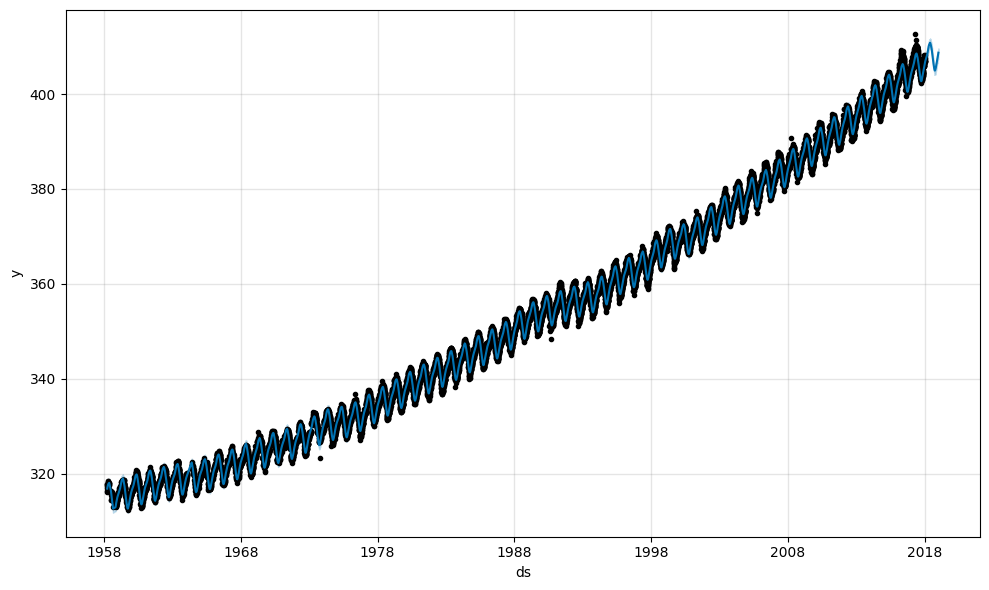

In [28]:
fig1 = m.plot(forecast)

Построим графики прогноза за неделю и год.

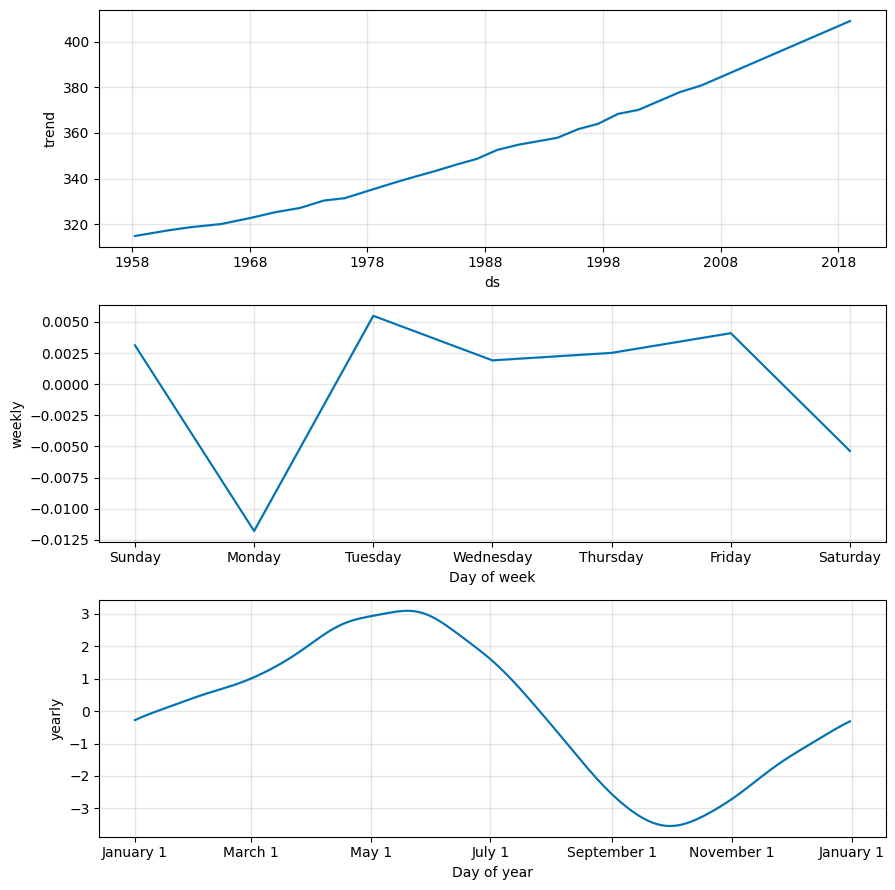

In [29]:
fig2 = m.plot_components(forecast)

Построить прогноз возможных выбросов СО2 в атмосферу на ближайшие 2 года. Используем модели случайного леса и регрессии.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

df.head()

X = df['ds']
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=85)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X, y)
y_pred = clf.predict(X_test)

ValueError: Expected 2D array, got 1D array instead:
array=[-3.7108799e+17 -3.7100161e+17 -3.7082882e+17 ...  1.5145057e+18
  1.5145920e+18  1.5146784e+18].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.